In [44]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform


# edit distance
def dist(word1, word2):
    m, n = len(word1), len(word2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0:
                dp[i][j] = j

            elif j == 0:
                dp[i][j] = i

            elif word1[i - 1] == word2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]

            else:
                dp[i][j] = 1 + min(dp[i][j - 1],
                                   dp[i - 1][j],
                                   dp[i - 1][j - 1]
                                  )

    return dp[m][n]

words = ["hello", "thankk", "you", "thank", "lou", "thenk", "very", "much"]

n = len(words)
distance_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(i + 1, n):
        distance = dist(words[i], words[j])
        distance_matrix[i, j] = distance
        distance_matrix[j, i] = distance

# hierarchical clustering
linked = linkage(squareform(distance_matrix), 'average')

threshold = 2
clusters = fcluster(linked, threshold, criterion='distance')

cluster_dict = {}
for i, word in enumerate(words):
    cluster_label = clusters[i]
    if cluster_label not in cluster_dict:
        cluster_dict[cluster_label] = []
    cluster_dict[cluster_label].append(word)

for label, cluster in cluster_dict.items():
    print(f"Cluster {label}: {', '.join(cluster)}")

cophenetic_corr, _ = cophenet(linked, squareform(distance_matrix))
print(f"Cophenetic Correlation Coefficient: {cophenetic_corr:.4f}")


Cluster 2: hello
Cluster 1: thankk, thank, thenk
Cluster 4: you, lou
Cluster 3: very
Cluster 5: much
Cophenetic Correlation Coefficient: 0.9296


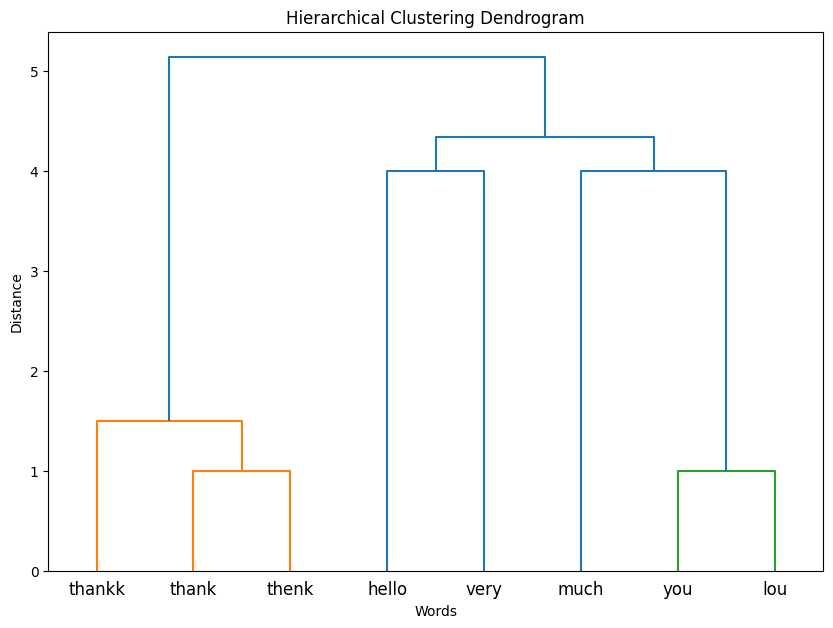

In [46]:
# dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=words, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Words')
plt.ylabel('Distance')
plt.show()